Import required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


 Load the dataset

In [2]:
df = pd.read_csv('nft_sales.csv')

Data cleaning – remove $ and commas, convert to numeric

In [4]:
def clean_numeric(col):
    return col.str.replace('[$,]', '', regex=True).replace('', pd.NA).astype('float64')

df['Sales'] = clean_numeric(df['Sales'])
df['Buyers'] = clean_numeric(df['Buyers'])
df['Txns'] = clean_numeric(df['Txns'])
df['Owners'] = clean_numeric(df['Owners'])


Question 1 – Which collection has the highest all-time buyers?

In [5]:
highest_buyers_row = df.loc[df['Buyers'].idxmax()]
print("Collection with the highest all-time buyers:")
print(f"   Collection: {highest_buyers_row['Collections']}")
print(f"   Buyers: {int(highest_buyers_row['Buyers']):,}")


Collection with the highest all-time buyers:
   Collection: Axie Infinity
   Buyers: 1,790,587


Question 2 – Correlation between Buyers and Sales

In [7]:
correlation = df['Buyers'].corr(df['Sales'])
print("\nCorrelation between Buyers and Sales:")
print(f"   Pearson correlation coefficient: {correlation:.4f}")
print("   Interpretation: Strong positive correlation" if abs(correlation) > 0.6 else "   Interpretation: Weak/moderate correlation")



Correlation between Buyers and Sales:
   Pearson correlation coefficient: 0.6692
   Interpretation: Strong positive correlation


Question 3 – Simple EDA and Visualization


Plot 1: Top 10 collections by Sales

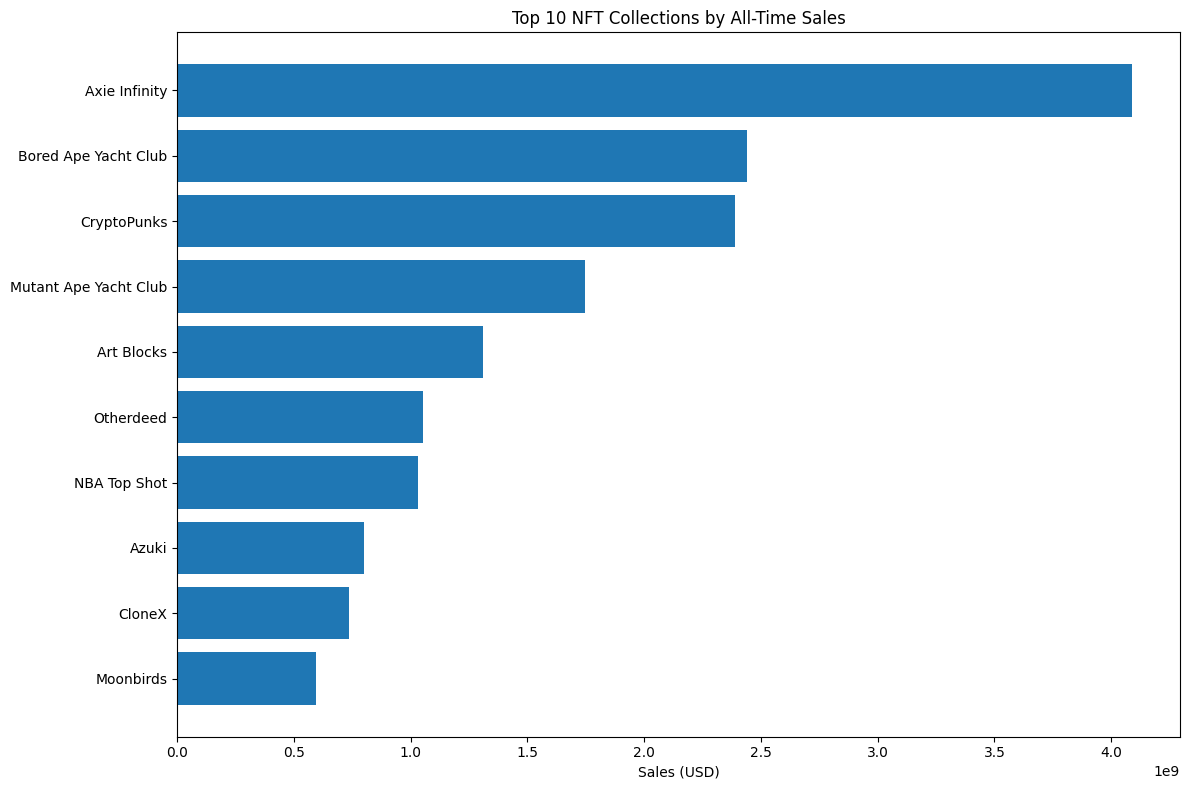

In [8]:
top10_sales = df.nlargest(10, 'Sales')
plt.figure(figsize=(12, 8))
plt.barh(top10_sales['Collections'], top10_sales['Sales'])
plt.xlabel('Sales (USD)')
plt.title('Top 10 NFT Collections by All-Time Sales')
plt.gca().invert_yaxis()  # Highest on top
plt.tight_layout()
plt.show()


Plot 2: Scatter plot – Buyers vs Sales

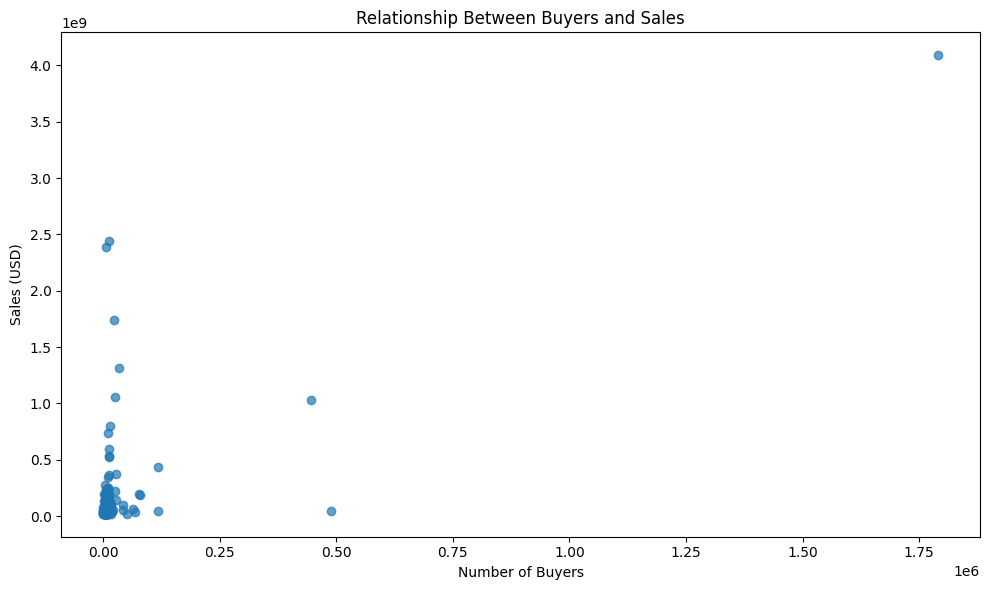

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Buyers'], df['Sales'], alpha=0.7)
plt.xlabel('Number of Buyers')
plt.ylabel('Sales (USD)')
plt.title('Relationship Between Buyers and Sales')
plt.tight_layout()
plt.show()